In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv("PS_20174392719_1491204439457_log.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df["org_difference"] = df['oldbalanceOrg'] - df['newbalanceOrig']
df["New_difference"] = df['oldbalanceDest'] - df['newbalanceDest']

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,org_difference,New_difference
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [10]:
data1 = df.groupby('type').size().reset_index(name='count')
data1

,type,count
0,CASH_IN,1399284
1,CASH_OUT,2237500
2,DEBIT,41432
3,PAYMENT,2151495
4,TRANSFER,532909


In [11]:
df_type = data1.copy()
df_type.rename(columns={'type':'transaction_type', 'count':'total_count'},inplace=True)
df_type

,transaction_type,total_count
0,CASH_IN,1399284
1,CASH_OUT,2237500
2,DEBIT,41432
3,PAYMENT,2151495
4,TRANSFER,532909


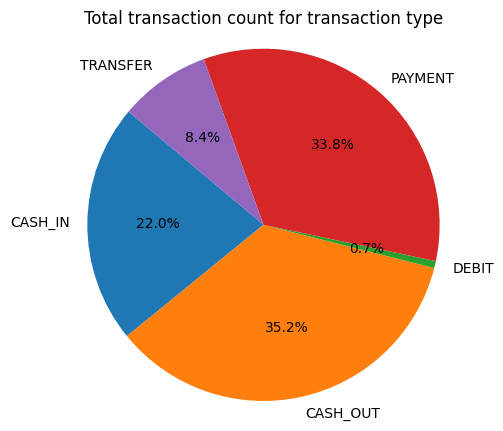

In [12]:
# Create a pie chart using Matplotlib
plt.figure(figsize=(5, 5))
plt.pie(df_type['total_count'], labels=df_type['transaction_type'], autopct='%1.1f%%', startangle=140)
plt.title('Total transaction count for transaction type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [13]:
data2 = df.groupby('type')['amount'].sum().reset_index(name='total_amount')
data2

,type,total_amount
0,CASH_IN,2.363674e+11
1,CASH_OUT,3.944130e+11
2,DEBIT,2.271992e+08
3,PAYMENT,2.809337e+10
4,TRANSFER,4.852920e+11


In [14]:
def number_format(number):
    units = 'B'
    k = 1000000000.0
    return '%1.3f'%(number/k)

In [15]:
total_money = data2.copy()
total_money.rename(columns={'type': 'transactions','total_amount':'total_amount'})

total_money['total_amount'] = total_money['total_amount'].apply(lambda x: number_format(x))
## format to float
total_money['total_amount'] = total_money['total_amount'].apply(lambda x: float(x))

In [16]:
total_money

,type,total_amount
0,CASH_IN,236.367
1,CASH_OUT,394.413
2,DEBIT,0.227
3,PAYMENT,28.093
4,TRANSFER,485.292


In [17]:
total_money = total_money.sort_values(by='total_amount')

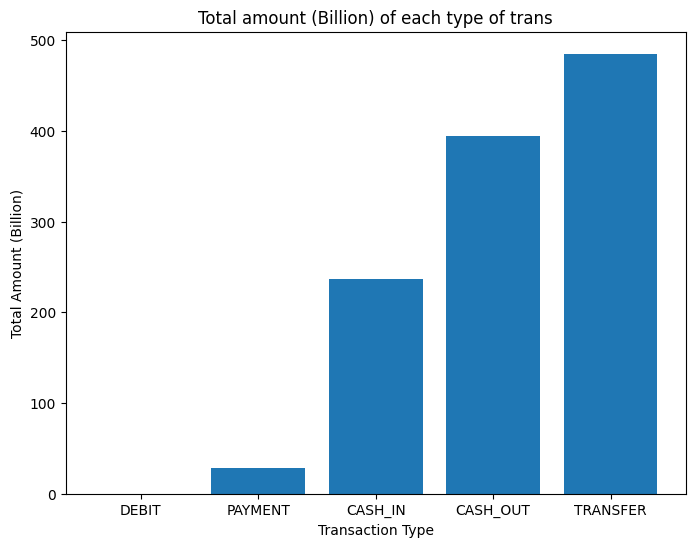

In [19]:
# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(total_money['type'], total_money['total_amount'])
plt.title('Total amount (Billion) of each type of trans')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount (Billion)')
plt.show()

In [20]:
# selecting the columns of numerical type
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

# pearson corrleation matrix of the numerical data
correlation = numeric_data.corr()

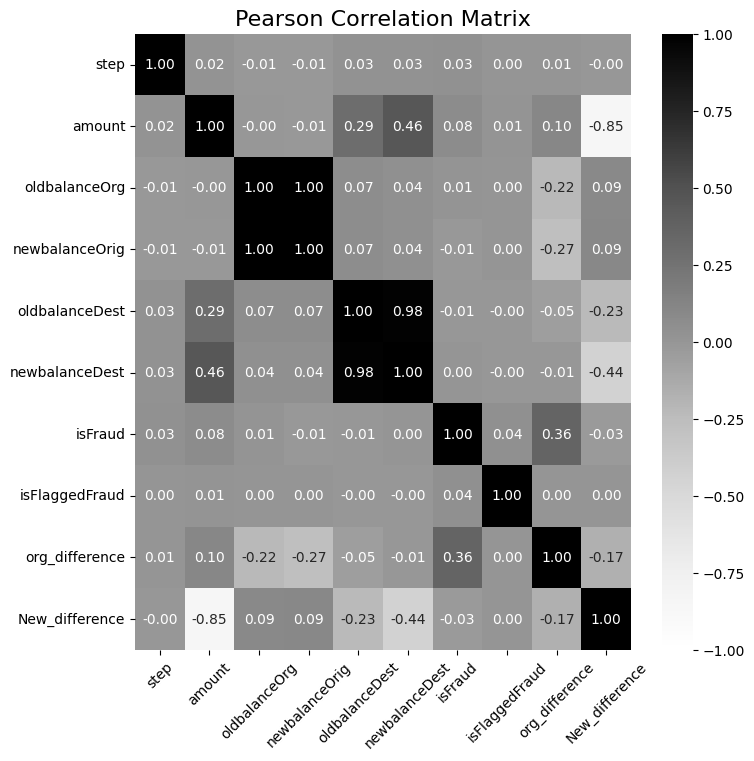

In [21]:
# visulaising the correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.heatmap(correlation,vmin = -1, vmax = 1,cmap = "Greys",annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

Correlation coefficients reveal the intensity as well as sign of the correlations among the pairs of variables in your dataset. Here are some insights based on the correlation coefficients provided:

Amount and New Balance in Destination Account:.

The correlation between 'amount' and 'newcomerVolumeDest' is relatively strong and the relation is positive and linear (0.459).

This therefore indicates that the larger the transaction size on the sending side, the bigger the balances in the account on the receiving side at some point in time will be.

Amount and Old Balance in Destination Account:.

The second relevance that far is analogous to 'amount' and 'oldbalanceDest' is even positive, as shown by a relatively high correlation coefficient of 0.294.

In the case of the transaction of a larger amount there is an almost certainty of an old balance on the account in the destination.

Old Balance in Origin Account and New Balance in Origin Account:.

The degree of association between 'oldbalanceOrg' and 'newbalanceOrig' assessed by the univariate correlation coefficient is as close to 1( 0.998 ), thereby indicating a very strong and positive linear relationship.

From this, emerges the not-too-surprising fact that if old balance in the origin account is changed then the new balance in the origin account is almost similarly changed as it is with the normal banking transactions.

Is Fraud and Transaction Amount:

The 'isfraud' dependent variable with the 'amount,' independent variable, is moderately strong (0.077), displaying a positive linear relationship.

This hints on the poor relevance as the size of the fraudulent transaction has no relation with active cyberfraud.

Is Fraud and Flagged Fraud:

The metric 'isFraud' and 'isFlaggedFraud' are rather weak (0.044), a positive linear association exists.

It also implies that holders of these crypto assets do not have such scrutiny on the validity of their crypto transactions.

Step and Fraudulent Activity:

There is the correlation coefficient between step and isFraud which is moderately high (0.032), that is to say, these metrics only correlate with each other minimally.

Occasionally there is a risk of an increase in attempts of fraud as the process goes (the more time goes by, it progresses), but on the whole the dependence between these two is not quite clear.

In [22]:
df.groupby(['type','isFraud']).count()

step   amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                              
CASH_IN  0        1399284  1399284   1399284        1399284         1399284   
CASH_OUT 0        2233384  2233384   2233384        2233384         2233384   
         1           4116     4116      4116           4116            4116   
DEBIT    0          41432    41432     41432          41432           41432   
PAYMENT  0        2151495  2151495   2151495        2151495         2151495   
TRANSFER 0         528812   528812    528812         528812          528812   
         1           4097     4097      4097           4097            4097   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  \
type     isFraud                                                             
CASH_IN  0         1399284         1399284         1399284         1399284   
CASH_OUT 0         2233384         2233384         2233384         2233384   
         1            4116            4116            4116            4116   
DEBIT    0           41432           41432           41432           41432   
PAYMENT  0         2151495         2151495         2151495         2151495   
TRANSFER 0          528812          528812          528812          528812   
         1            4097            4097            4097            4097   

                  org_difference  New_difference  
type     isFraud                                  
CASH_IN  0               1399284         1399284  
CASH_OUT 0               2233384         2233384  
         1                  4116            4116  
DEBIT    0                 41432           41432  
PAYMENT  0               2151495         2151495  
TRANSFER 0                528812          528812  
         1                  4097            4097

In [23]:
# Set of rules to identify known fraud-based
rules_fraud_based_df = df.copy()
conditions = (
    ((df['oldbalanceOrg'] <= 56900) & 
     (df['type'] == 'TRANSFER') & 
     (df['newbalanceDest'] <= 105)) |
    ((df['oldbalanceOrg'] > 56900) & 
     (df['newbalanceOrig'] <= 12)) |
    ((df['oldbalanceOrg'] > 56900) & 
     (df['newbalanceOrig'] > 12) & 
     (df['amount'] > 1160000))
)

rules_fraud_based_df['label'] = np.where(conditions, 1, 0)

# Calculate proportions
fraud_cases = rules_fraud_based_df['label'].sum()
total_cases = len(rules_fraud_based_df)
fraud_pct = fraud_cases / total_cases

# Provide a quick statistics
print(f"Based on these rules, we have flagged {fraud_cases} ({fraud_pct:.2%}) fraud cases out of a total of {total_cases} cases.")

Based on these rules, we have flagged 255640 (4.02%) fraud cases out of a total of 6362620 cases.


In [24]:
data3 = rules_fraud_based_df.groupby('label').agg(
    count=('label', 'size'), 
    total_amount=('amount', 'sum')
).reset_index()

In [25]:
df_based_rules = data3.copy()
df_based_rules.rename(columns={'count':'transactions'}, inplace=True)
df_based_rules['flagged_label'] = np.where(df_based_rules['label']==1, 'fraud', 'normal')
df_based_rules

,label,transactions,total_amount,flagged_label
0,0,6106980,1.015069e+12,normal
1,1,255640,1.293243e+11,fraud


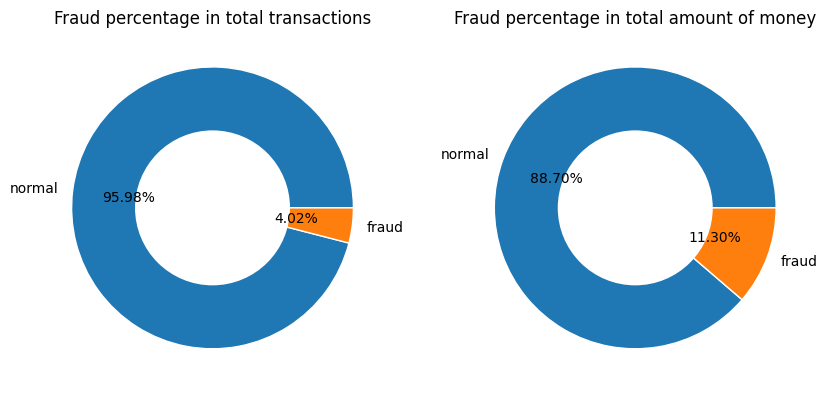

In [26]:
labels = df_based_rules.flagged_label
volume = df_based_rules.transactions
amount = df_based_rules.total_amount
explode = (0.1, 0.0) #2 volumes to be exploded 

# double pie charts
# Make figure and axes
fig, axs = plt.subplots(1,2, figsize=(10, 5))
#first pie
axs[0].pie(volume, labels=labels, autopct='%1.2f%%',\
            wedgeprops= {"edgecolor":"white", 'linewidth': 1, 'antialiased': True})
axs[0].set_title("Fraud percentage in total transactions")

# Adding Circle in first Pie chart
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
axs[0].add_artist(centre_circle)
#second pie
axs[1].pie(amount, labels=labels, autopct='%1.2f%%',\
             wedgeprops= {"edgecolor":"white", 'linewidth': 1, 'antialiased': True})
axs[1].set_title("Fraud percentage in total amount of money")

# Adding Circle in second Pie chart
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
axs[1].add_artist(centre_circle)

plt.show()


In [27]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,org_difference,New_difference
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [29]:
encode = OrdinalEncoder()
df['type'] = encode.fit_transform(df[['type']])
df['nameOrig'] = encode.fit_transform(df[['nameOrig']])
df['nameDest'] = encode.fit_transform(df[['nameDest']])

In [30]:
x=df.drop("isFraud",axis=1)
y=df["isFraud"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [32]:
y.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

model = DecisionTreeClassifier().fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Decision Tree Classifier accuracy score: ',accuracy)

Decision Tree Classifier accuracy score:  0.9996542304899554


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:\n', conf_matrix)


Precision: 0.8690773067331671
Recall: 0.8583743842364532
F1-score: 0.8636926889714994
Confusion Matrix:
 [[1270690     210]
 [    230    1394]]


In [36]:
conf_matrix_df=pd.DataFrame(conf_matrix,columns=["predicted0","predicted1"])
conf_matrix_df.rename(index={0:"Actual_0",1:"Actual_1"},inplace=True)

In [38]:
conf_matrix_df

,predicted0,predicted1
Actual_0,1270690,210
Actual_1,230,1394


Precision: 0.8810679611650486
Recall: 0.868421052631579
F1-score: 0.8746987951807229
Confusion Matrix:
 [[1270656     196]
 [    220    1452]]
This report provides an evaluation of the performance of a binary classifier, likely for a fraud detection task, based on the provided precision, recall, F1-score, and confusion matrix.

Here's an interpretation of each metric and the confusion matrix:

Precision: Precision is the ratio of true positive predictions to the total number of positive predictions made by the classifier. In this case, it's approximately 0.88, indicating that when the classifier predicts a transaction as fraudulent, it is correct about 88% of the time.

Recall: Recall, also known as sensitivity, is the ratio of true positive predictions to the total number of actual positive instances in the data. A recall of around 0.87 suggests that the classifier correctly identifies about 87% of all actual fraudulent transactions.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. A high F1-score indicates good overall performance of the classifier. Here, the F1-score is approximately 0.87, indicating a balanced performance between precision and recall.

Confusion Matrix: The confusion matrix is a table that summarizes the performance of a classification algorithm. It shows the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. In this case:

True positives (TP): 1452 True negatives (TN): 1270656 False positives (FP): 196 False negatives (FN): 220 This information helps in understanding where the classifier is making errors. In particular, it shows that the classifier has a relatively low number of false positives (196) compared to true positives (1452), indicating that it is effective at minimizing false alarms.

Overall, the classifier appears to perform well, with high precision, recall, and F1-score, indicating effective fraud detection capabilities. However, further analysis and potentially adjusting the model's threshold might be necessary, depending on the specific requirements of the application.